In [190]:
%matplotlib inline

import os
os.chdir("/Volumes/WorkDrive/gimmeSAD")
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt

# Begin simulation code

In [191]:
## Create the spatial model
data = implicit_BI.implicit_BI()

## Select the composition of the metacommunity
data.set_metacommunity("metacommunity_LS4.txt")
#data.set_metacommunity("uniform")

## Select the geologic process
#data.prepopulate(mode="landbridge")
data.prepopulate(mode="volcanic")

## quicksort stolen from the internet
def qsort(arr): 
     if len(arr) <= 1:
          return arr
     else:
          return qsort([x for x in arr[1:] if x.abundance<arr[0].abundance])\
                    + [arr[0]] + qsort([x for x in arr[1:] if x.abundance>=arr[0].abundance])

In [192]:
## Run the simulation for a while
for i in range(50000):
    if not i % 10000:
        print("Done {}".format(i))
        #print(i, len(data.local_community), len(set(data.local_community)))
    data.step()

Done 0
Done 10000
Done 20000
Done 30000
Done 40000


In [193]:
## When you decide you've run the simulations long enough, then simulate sequences for
## each species
data.simulate_seqs()

## Get the current abundace distribution and plot it
abundance_distribution = data.get_abundances(octaves=False)
print(gimmeSAD.plot_abundances_ascii(abundance_distribution))



Simulated Species Abundance Distribution
###############################################################################
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  8  1   
|||||||||||||||||||||||||||||||||||||||||||                             5  2   
|||||||||||||||||                                                       2  3   
||||||||                                                                1  6   
||||||||                                                                1  9959
||||||||                                                                1  11  
###############################################################################



In [194]:
print(gimmeSAD.tabulate_sumstats(data))

Species Name                    Col time    Loc Abund    Meta Abund      pi    pi_net     Dxy    S    S_island    pi_island    S_meta    pi_meta
----------------------------  ----------  -----------  ------------  ------  --------  ------  ---  ----------  -----------  --------  ---------
Dioryctria terebrans                4044            1        116299  0.0348    0.0199  0.0443   81           0       0.0000        79     0.0486
Jonthonota kuriphilus              24277            3         65821  0.0097    0.0070  0.0130   34           0       0.0000        30     0.0121
Phenacoccus spretulus              49999         9959        253524  0.0171    0.0088  0.0212   84          14       0.0035        66     0.0214
Haplothrips quadrigibbus           16391            2         15703  0.0044    0.0055  0.0070   11           1       0.0003         7     0.0028
Kilifia humile                      6090            1         43906  0.0049    0.0058  0.0076   12           0       0.0000       

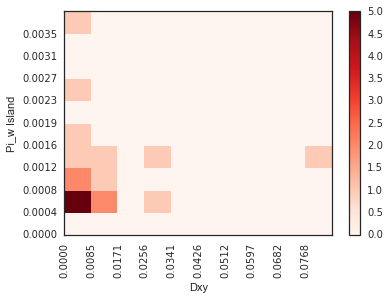

In [195]:
gimmeSAD.heatmap_pi_dxy(data)

In [69]:
## Bunch of code for generating the matrix to plug into the heatmap
sp = data.get_species()
heat = np.zeros((10,10), dtype=np.int)

for s in sp:
    s.simulate_seqs()
    s.get_sumstats()
pis = np.array([(x.pi, x.pi_island) for x in sp])
max_pi = max([x[0] for x in pis])
max_pi_island = max([x[1] for x in pis])
print max_pi, max_pi_island
## Make the bins
pi_bins = np.linspace(0, np.log(max_pi), 10)
pi_island_bins = np.linspace(0, np.log(max_pi_island), 10)

## Now you have the bins each value belongs in, but you need to 
## go through and populate the heat matrix
for pi, pi_island in pis:
    count_pi = 0
    count_pi_island = 0
    while not np.log(pi) <= pi_bins[count_pi]:
        count_pi += 1
    while not np.log(pi_island) <= pi_island_bins[count_pi_island]:
        count_pi_island += 1
    ## increment the heatmap point this corresponds to
    heat[count_pi][count_pi_island] += 1

    print(heat)

254.410526316 144.266666667
[[9 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [2 0 2 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [305]:
import matplotlib.pyplot as plt

## Code for debugging the heatmap function
def myheatmap_pi_dxy(data):
    sp = data.get_species()

    heat = np.zeros((10,10), dtype=np.int)

    pis = np.array([(x.dxy, x.pi_island) for x in sp])
    max_pi = max([x[0] for x in pis])
    max_pi_island = max([x[1] for x in pis])
    print(max_pi, max_pi_island)

    ## Make the bins
    pi_bins = np.linspace(0, max_pi, 10)
    pi_island_bins = np.linspace(0, max_pi_island, 10)

    ## Now you have the bins each value belongs in, but you need to 
    ## go through and populate the heat matrix
    for pi, pi_island in pis:
        count_pi = 0
        count_pi_island = 0
        while not pi <= pi_bins[count_pi]:
            count_pi += 1
        while not pi_island <= pi_island_bins[count_pi_island]:
            count_pi_island += 1
        ## increment the heatmap point this corresponds to
        heat[count_pi][count_pi_island] += 1
        

    fig = plt.figure(figsize=(12,5))
    ax = plt.subplot(121)

    cmap = plt.cm.jet
    cmap.set_under('white')
    eps = np.spacing(0.1)
    
    #heat = np.ma.masked_where(heat < 1, heat)
    
    ax.pcolormesh(heat, cmap=cmap, vmin=eps)

    #cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])  # This is the position for the colorbar
    #cb = plt.colorbar(ax, cax = cbaxes)
    
    #    plt.axis([0, max_pi, 0, max_pi_island])
    plt.title("RankAbundance", fontsize=28)
    plt.xlabel('Dxy')
    plt.ylabel('Pi_w Island')
    #plt.colorbar()
    plt.xticks(np.arange(len(pi_bins)), ["{0:.4f}".format(x) for x in pi_bins], rotation='vertical')
    plt.yticks(np.arange(len(pi_bins)), ["{0:.4f}".format(x) for x in pi_island_bins])

    import matplotlib.patheffects as PathEffects
    for y in range(heat.shape[0]):
        for x in range(heat.shape[1]):
            if heat[y, x] < 1:
                val = ""
            else:
                val = str(int(heat[y,x]))
            plt.text(x + 0.5, y + 0.5, '%s' % val,
                     horizontalalignment='center',
                     verticalalignment='center',
                     path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")])

    plt.subplot(122)
    species = sp
    species = qsort(species)
    species = species[::-1]
    x = np.arange(0,len(species))
    y = [xx.abundance for xx in species]
    y[0] = 176400
    plt.scatter(x, y, color="red")
    plt.xlim(0, len(species))
    plt.ylim(0, y[0])
    plt.ylabel("Abundance")
    plt.xlabel("Rank")
    plt.title("RankAbundance", fontsize=28)
    
    fig.get_axes()[0].annotate('Long Suptitle', (0.5, 0.96), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=24
                            )
    #plt.tight_layout()

    plt.show()
    plt.savefig("wat.png")
    plt.close()


(0.076750000000000096, 0.0035000000000000005)


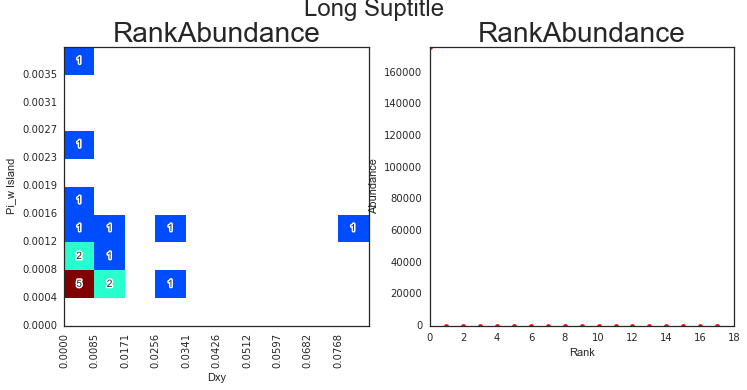

In [306]:

myheatmap_pi_dxy(data)

# Work on getting the heatmap axes normalized

In [21]:
sp_through_time = {}

In [22]:
## Get a chunk of data
for i in range(10):
    data.step(i*10000)
    data.simulate_seqs()
    sp_through_time[i] = data.get_species()

In [54]:
normalized_pi_dxy_heatmaps("/tmp", sp_through_time)

[1039, 689, 403, 722, 11, 662, 1380, 1554, 1162, 1480, 1301, 565, 832, 853, 1554, 66, 435, 1634, 1384, 1180, 499, 1234, 1416, 19, 1494, 1499, 1242, 1449, 584, 456, 1122, 535, 1503, 566]
(1.0202500000000034, 0.1094166666666668)
(0.99750000000000327, 0.12838888888888919)
(1.0356250000000042, 0.12505555555555578)
(1.1433750000000031, 0.15602777777777799)
(1.2398750000000036, 0.081722222222222293)
(1.2398750000000036, 0.15602777777777799)
('Doing', 'Time_11')
('Doing', 'Time_12')
('Doing', 'Time_13')
('Doing', 'Time_14')
('Doing', 'Time_15')


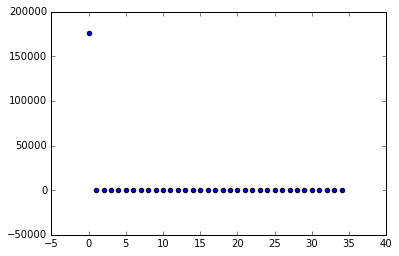

In [23]:
species = sp_through_time[9]
## Rank species by abundance
species = qsort(species)
species = species[::-1]
x = np.arange(0,len(species))
y = [xx.abundance for xx in species]
y[0] = 176400
plt.scatter(x, y)
plt.show()


<function matplotlib.pyplot.show>

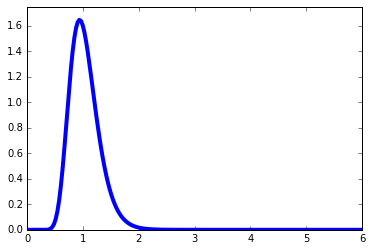

In [137]:
from scipy.stats import lognorm
import numpy as np
import pylab as pl

## Figs use (lognorm = [0.25, 0.5, 1,0.3])

stddev = 0.25
mean = 1.18749176686875
dist=lognorm(0.25, 0)
x=np.linspace(0,6,200)
pl.plot(x,dist.pdf(x), color="blue", linewidth=4)
pl.ylim(0, 1.75)
pl.show
#pl.plot(x,dist.cdf(x))



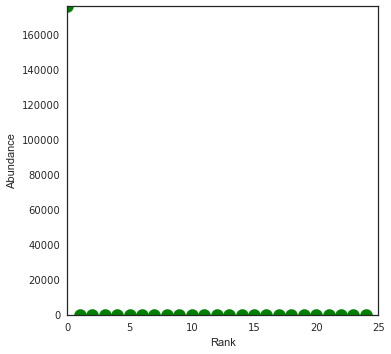

In [156]:
fig = plt.figure(figsize=(10,5))
if True:
    plt.subplot(122)
    species = qsort(species)
    species = species[::-1]
    x = np.arange(0,len(species))
    y = [xx.abundance for xx in species]
    y[0] = 176400
    plt.scatter(x, y, color="green", s=150)
    plt.xlim(0, len(species))
    plt.ylim(0, y[0])
    plt.ylabel("Abundance")
    plt.xlabel("Rank")
    
    plt.tight_layout()

    plt.show()

In [150]:
abund = data.get_abundances(octaves=True)
print(abund)

OrderedDict([(1, 12), (2, 2), (4, 2), (8, 5), (16, 4)])


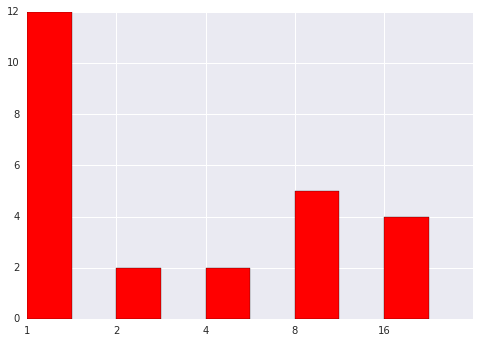

In [182]:

ab_class, count = zip(*abund.items())

num_items = len(count)
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(num_items), count, width, color='r')
ax.set_xticks(np.arange(num_items + width))
ax.set_xticklabels(ab_class)
plt.show()

In [32]:
import collections 
max([len(sp) for sp in sp_through_time.values()])
max([max([y.abundance for y in sp]) for sp in sp_through_time.values()])
equilibria = collections.OrderedDict(zip([0] * 1000, [0] * 1000))
gimmeSAD.plot_rank_abundance_through_time("/Volumes/WorkDrive/gimmeSAD/output", sp_through_time, equilibria)

Generating abunance distributions through time
Got	max_n_species - 35	 max_abundance - 9940
Got	max_octave - 9940	 max_class_count - 14
(1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192) (12, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)


IndexError: list index out of range

((1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192), (5, 4, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1))


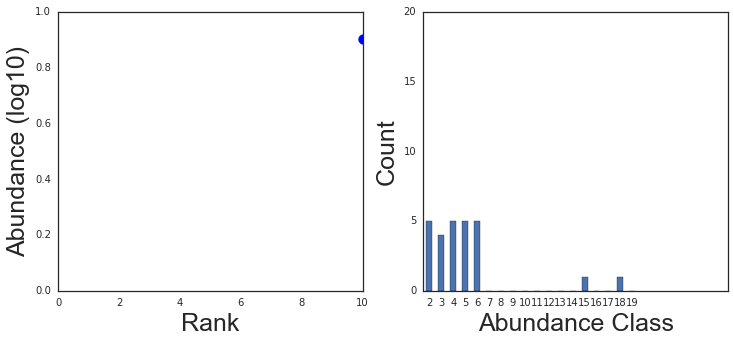

In [307]:
import math
max_n_species=10
max_abundance=10
max_n_bins=5
max_class_count=20
octave_bin_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

if True:
    if True:
        fig = plt.figure(figsize=(12,5))

        ## Make the rank abundance distribution
        plt.subplot(121)
        species = qsort(sp_through_time.values()[5])
        species = species[::-1]
        x = np.arange(0,len(species))
        y = [np.log10(xx.abundance) for xx in species]
        plt.scatter(x, y, color="blue", s=100)
        plt.xlim(0, max_n_species)
        plt.ylim(0, int(math.ceil(np.log10(max_abundance))))
        plt.ylabel("Abundance (log10)", fontsize=25)
        plt.xlabel("Rank", fontsize=25)

        ## Make the SAD subplot
        abund = gimmeSAD.abundances_from_sp_list(species, octaves=True)
        
        ax1 = plt.subplot(122)
        ab_class, count = zip(*abund.items())
        print(ab_class, count)
        df = pd.DataFrame([x for x in count], index = [str(x) for x in ab_class])
        df.loc[12]=0
        df.loc[13]=0
        df.loc[10000000]=1
        df.loc[14] = 0
        bar = df.plot(kind = "bar", legend = False, ax = ax1)
        plt.xlim([-0.5, max_n_bins+20])
        ax1.set_xticklabels([str(x+1) for x in octave_bin_labels])
        plt.setp(bar.get_xticklabels(), rotation=0)
        plt.ylim(0, max_class_count)
        plt.xlabel("Abundance Class", fontsize=25)
        plt.ylabel("Count", fontsize=25)

In [75]:
len(df)

16

In [83]:
one_d = np.array([[12, 0, 0, 0, 0, 0, 1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0]])

([], <a list of 0 Text yticklabel objects>)

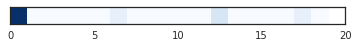

In [95]:
fig = plt.figure(figsize=(6, 0.3))
plt.pcolor(one_d,cmap=plt.cm.Blues)
plt.ylim(0,1)
plt.yticks([])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], array([12,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        1,  0]))


ValueError: need more than 1 value to unpack

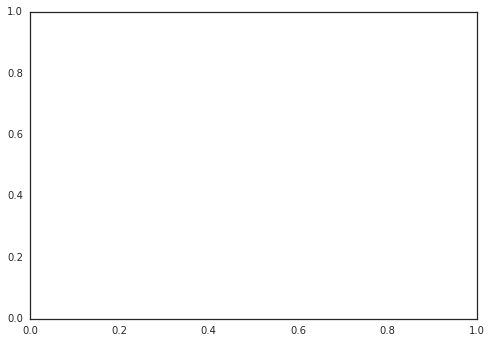

In [103]:
X = [x for x in np.arange(len(one_d[0]))]
Y = [1] * len(X)
Z = one_d[0]
print(X, Y, Z)
plt.pcolor(X, 1, Z, cmap=plt.cm.Blues)
plt.ylim(0,1)
plt.axis([0, 20, 0, 0.1])
#plt.yticks([])

In [135]:
X = np.array([[0, 1, 2, 3, 4],
           [0, 1, 2, 3, 4],
           [0, 1, 2, 3, 4]])

Y = np.array([[0, 0, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [2, 2, 2, 2, 2]])
C = np.random.rand(4,2)
print(C)
print(np.amax(X))

[[ 0.26251947  0.70003364]
 [ 0.29321727  0.0719833 ]
 [ 0.07392543  0.37784176]
 [ 0.47300078  0.93797978]]
4


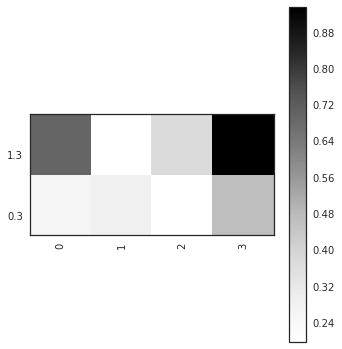

In [155]:
f = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ax1.set_aspect('equal')
wat = plt.pcolormesh(C.T, vmin=.2)
plt.colorbar()
ax1.set_xticks(np.arange(C.T.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(C.T.shape[0]) + 0.3, minor=False)
ax1.set_xticklabels(np.arange(C.T.shape[1]), rotation="vertical")

m = 0.001
Values for M
	min 1e-05
	max 253.52422
	mean 6.11056995724
	median 0.0205
	variance 444.198342584
m = 0.005
Values for M
	min 5e-05
	max 1267.6211
	mean 30.5528497862
	median 0.1025
	variance 11104.9585646
m = 0.01
Values for M
	min 0.0001
	max 2535.2422
	mean 61.1056995724
	median 0.205
	variance 44419.8342584
m = 0.05
Values for M
	min 0.0005
	max 12676.211
	mean 305.528497862
	median 1.025
	variance 1110495.85646
m = 0.1
Values for M
	min 0.001
	max 25352.422
	mean 611.056995724
	median 2.05
	variance 4441983.42584


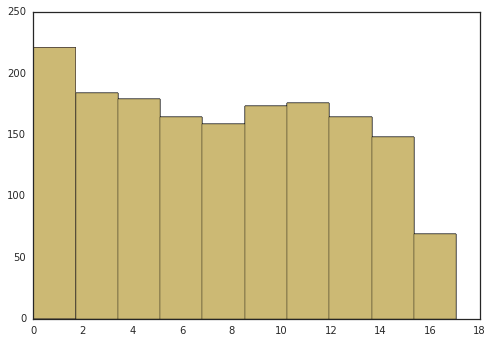

In [186]:
fname = "/Volumes/WorkDrive/gimmeSAD/metacommunity_LS4.txt"
for val in [0.001, 0.005, 0.01, 0.05, 0.1]:
    inf = open(fname)
    dat = [x.strip() for x in inf.readlines()]
    dat = np.array([int(x) for x in dat])
    plt.hist(np.log(dat))
    dat = val * (dat / 100.)
    print("m = {}".format(val))
    print("Values for M")
    print("\tmin {}".format(min(dat)))
    print("\tmax {}".format(max(dat)))
    print("\tmean {}".format(np.mean(dat)))
    print("\tmedian {}".format(np.median(dat)))
    print("\tvariance {}".format(np.var(dat)))


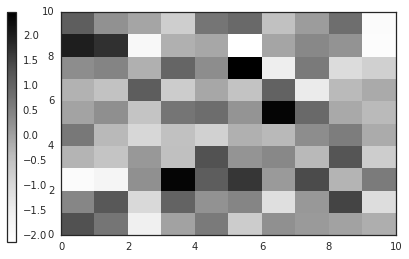

In [285]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

np.random.seed(10)

#ax.pcolor(np.random.randn((10,10)))
#ax.pcolor(np.random.randn(10), np.random.randn(10))
axp = ax.pcolormesh(np.random.randn(10,10))
cbaxes = fig.add_axes([0, 0.1, 0.02, 0.8])
cb = plt.colorbar(axp, cax = cbaxes)
plt.show()

[1013, 16393, 9186, 49999, 31130, 27403, 39321, 14168, 7525, 4406, 37278, 578, 39562, 11672, 4417, 35477, 41562, 4637, 25847, 3445, 40632, 842]
[1, 1, 2, 9940, 7, 1, 1, 1, 1, 1, 11, 1, 2, 4, 1, 2, 13, 3, 1, 1, 4, 1]


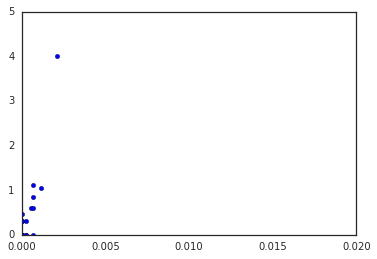

[1041, 249, 19186, 8871, 59999, 6700, 1862, 24168, 5493, 14406, 47278, 49562, 21672, 5589, 1592, 51562, 14637, 166, 7064, 50632]
[1, 1, 1, 1, 9921, 17, 1, 2, 2, 1, 12, 2, 5, 1, 2, 9, 5, 1, 2, 13]


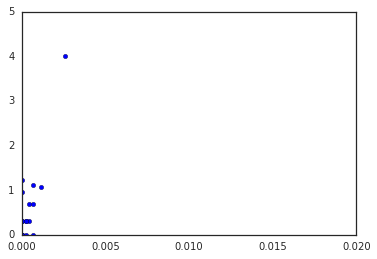

[1490, 21041, 4409, 28871, 10370, 79999, 26700, 14758, 9641, 13852, 44168, 13298, 14267, 25493, 7530, 3008, 11714, 59, 67278, 41672, 3551, 71562, 34637, 2664, 8799, 19874, 6524, 70632]
[1, 2, 1, 9, 1, 9875, 19, 1, 1, 1, 1, 8, 2, 7, 1, 1, 3, 1, 8, 9, 1, 9, 1, 1, 1, 3, 4, 28]


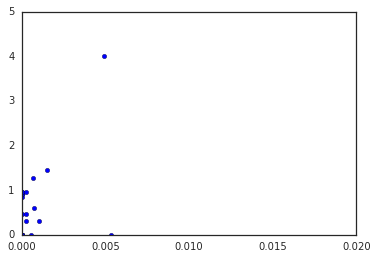

[28360, 7593, 43298, 6349, 71672, 101562, 17845, 6701, 911, 43852, 6838, 5690, 37530, 2038, 18761, 39641, 109999, 33008, 15018, 49874, 4127, 7553, 2089, 3034, 100632, 1402, 56700, 3122, 55493, 17906, 3018, 11760, 2794, 25019, 6732]
[2, 3, 9, 3, 10, 8, 1, 4, 2, 2, 1, 1, 6, 1, 8, 1, 9835, 2, 8, 2, 1, 1, 2, 1, 21, 2, 24, 2, 3, 1, 1, 1, 2, 5, 24]


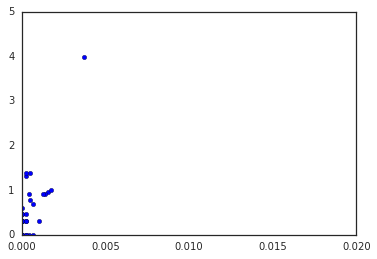

[2100, 37425, 68360, 83298, 31574, 46349, 23045, 111672, 679, 83852, 77530, 58761, 34699, 2923, 149999, 1784, 5340, 35238, 24691, 89874, 42089, 140632, 31042, 2757, 4875, 19605, 43122, 30882, 95493, 46732, 14890, 6595]
[1, 7, 1, 6, 1, 12, 7, 11, 4, 5, 5, 1, 2, 1, 9750, 1, 1, 17, 2, 5, 10, 22, 1, 12, 61, 2, 11, 1, 15, 23, 1, 1]


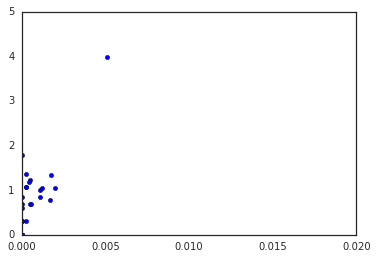

[18545, 9881, 9139, 5688, 18142, 8616, 30492, 48560, 11015, 993, 127530, 4926, 37632, 199999, 3064, 14907, 139874, 190632, 34691, 23188, 5035, 21629, 34236, 7658, 8393]
[17, 1, 1, 18, 13, 1, 5, 2, 6, 1, 8, 1, 3, 9795, 5, 3, 11, 21, 14, 13, 3, 29, 7, 4, 18]


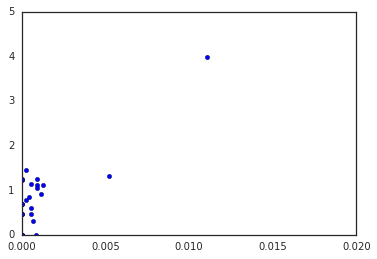

[78545, 34604, 65688, 78142, 12126, 25883, 413, 90492, 24514, 71015, 32386, 30540, 2602, 259999, 55389, 5485, 63064, 74907, 199874, 7095, 12459, 250632, 94691, 1363, 25022, 4919, 1048, 18466, 67658, 17116, 68393]
[6, 2, 9, 18, 1, 4, 1, 2, 1, 11, 13, 7, 1, 9730, 9, 1, 18, 3, 14, 1, 2, 54, 22, 1, 22, 5, 1, 3, 16, 3, 19]


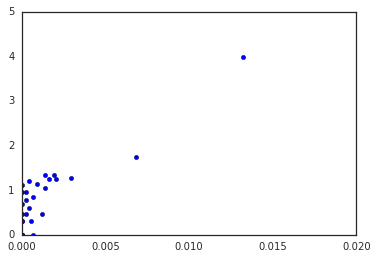

[64513, 38057, 6174, 2680, 69777, 148142, 36275, 1453, 54186, 43700, 18338, 70413, 8270, 42395, 16550, 42131, 2979, 51068, 21362, 35132, 329999, 7463, 58943, 5290, 20433, 320632, 50449, 95022, 30017, 18179, 1900, 7142, 138393]
[6, 3, 1, 1, 18, 32, 5, 1, 32, 13, 1, 7, 3, 6, 15, 26, 1, 1, 4, 11, 9673, 1, 10, 14, 7, 27, 1, 53, 3, 4, 1, 1, 18]


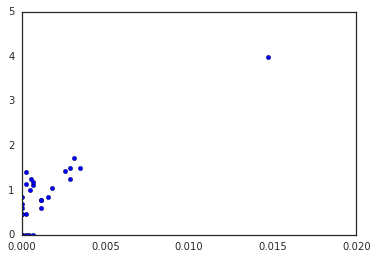

[31684, 118057, 5651, 4795, 70019, 228142, 19389, 36206, 23945, 24084, 19774, 36617, 150413, 48365, 96550, 48675, 13463, 4100, 101362, 115132, 5416, 409999, 7359, 87463, 10372, 75400, 400632, 22954, 175022, 52709, 46134, 218393]
[11, 8, 2, 1, 29, 30, 2, 5, 65, 10, 2, 4, 6, 14, 16, 20, 1, 1, 15, 28, 1, 9608, 1, 10, 19, 14, 26, 1, 39, 3, 3, 5]


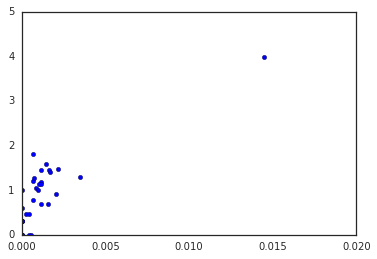

[42069, 208057, 3770, 1091, 2785, 160019, 318142, 1023, 10497, 9758, 707, 138365, 47386, 4467, 14869, 21755, 22332, 4268, 499999, 30714, 97359, 177463, 100372, 54440, 58098, 30906, 490632, 6060, 536, 265022, 13476, 40480, 35258, 53250, 67312]
[4, 16, 3, 1, 1, 24, 14, 6, 54, 3, 41, 41, 7, 1, 3, 2, 12, 42, 9559, 2, 9, 13, 5, 1, 14, 2, 28, 4, 1, 71, 1, 8, 4, 1, 2]


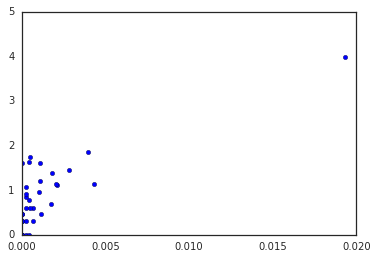

In [324]:
#print(sp_through_time)
for sp in sp_through_time.values():
    print([s.colonization_time for s in sp])
    print([s.abundance for s in sp])

    x = [s.pi_island for s in sp]
    y = [np.log10(s.abundance) for s in sp]
    plt.scatter(x, y)
    plt.ylim(0, 5)
    plt.xlim(0, 0.02)
    plt.show()

In [320]:
np.random.randn(10,10)

array([[ 0.11747566, -1.90745689, -0.92290926,  0.46975143, -0.14436676,
        -0.40013835, -0.29598385,  0.84820861,  0.70683045, -0.78726893],
       [ 0.29294072, -0.47080725,  2.40432561, -0.73935674, -0.31282876,
        -0.34888192, -0.43902624,  0.14110417,  0.27304932, -1.61857075],
       [-0.57311336, -1.32044755,  1.23620533,  2.46532508,  1.38323223,
         0.34623312,  1.02251611,  0.16681027,  1.65671662,  0.66788961],
       [-0.22994664, -1.12955119, -0.6399626 ,  0.31383052, -1.22583598,
        -0.22179314,  1.33992631,  0.02930971,  1.98538575,  1.4471656 ],
       [-0.28762941, -1.35931057, -0.04804133, -0.48078734,  0.37775309,
         1.61440797, -1.12310404, -0.38872795,  0.33234995,  1.13497317],
       [ 0.51071441,  0.41429764,  1.34454942,  0.49351532, -0.23700418,
         0.05728515, -0.70707145,  0.54666484,  0.94250041, -2.97959677],
       [ 1.21814885, -0.05652072,  0.46088845,  0.66237401, -2.29510333,
        -1.19592931, -0.33310116, -0.79139077